<a href="https://colab.research.google.com/github/Parkshinhyang/Programmers/blob/main/%EC%A3%BC%EC%B0%A8_%EC%9A%94%EA%B8%88_%EA%B3%84%EC%82%B0(Lv_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 - 주차 요금 계산

[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/92341)

## 문제 설명

주차장의 요금표와 차량이 들어오고(입차) 나간(출차) 기록이 주어졌을 때, 차량별로 주차 요금을 계산하려고 합니다. 아래는 하나의 예시를 나타냅니다.

- 요금표

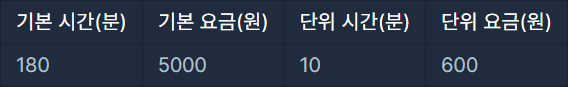

- 입출차 기록

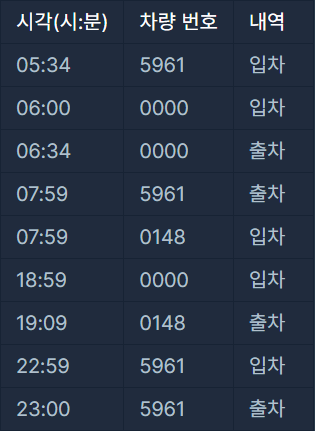

- 자동차별 주차 요금

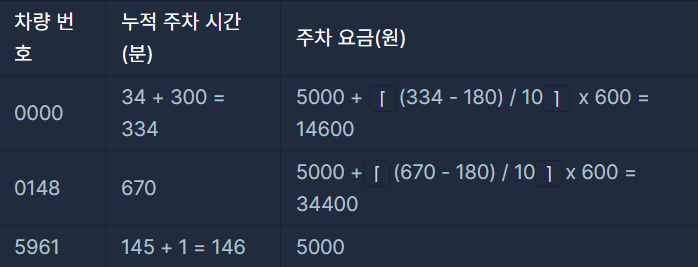

- 어떤 차량이 입차된 후에 출차된 내역이 없다면, 23:59에 출차된 것으로 간주합니다.
    - 0000번 차량은 18:59에 입차된 이후, 출차된 내역이 없습니다. 따라서, 23:59에 출차된 것으로 간주합니다.
- 00:00부터 23:59까지의 입/출차 내역을 바탕으로 차량별 누적 주차 시간을 계산하여 요금을 일괄로 정산합니다.
- 누적 주차 시간이 기본 시간이하라면, 기본 요금을 청구합니다.
- 누적 주차 시간이 기본 시간을 초과하면, 기본 요금에 더해서, 초과한 시간에 대해서 단위 시간 마다 단위 요금을 청구합니다.
    - 초과한 시간이 단위 시간으로 나누어 떨어지지 않으면, 올림합니다.
    - ⌈a⌉ : a보다 작지 않은 최소의 정수를 의미합니다. 즉, 올림을 의미합니다.

주차 요금을 나타내는 정수 배열 fees, 자동차의 입/출차 내역을 나타내는 문자열 배열 records가 매개변수로 주어집니다. 차량 번호가 작은 자동차부터 청구할 주차 요금을 차례대로 정수 배열에 담아서 return 하도록 solution 함수를 완성해주세요.

## 제한사항

- fees의 길이 = 4
    - fees[0] = 기본 시간(분)
    - 1 ≤ fees[0] ≤ 1,439
    - fees[1] = 기본 요금(원)
    - 0 ≤ fees[1] ≤ 100,000
    - fees[2] = 단위 시간(분)
    - 1 ≤ fees[2] ≤ 1,439
    - fees[3] = 단위 요금(원)
    - 1 ≤ fees[3] ≤ 10,000
- 1 ≤ records의 길이 ≤ 1,000
    - records의 각 원소는 "시각 차량번호 내역" 형식의 문자열입니다.
    - 시각, 차량번호, 내역은 하나의 공백으로 구분되어 있습니다.
    - 시각은 차량이 입차되거나 출차된 시각을 나타내며, HH:MM 형식의 길이 5인 문자열입니다.
        - HH:MM은 00:00부터 23:59까지 주어집니다.
        - 잘못된 시각("25:22", "09:65" 등)은 입력으로 주어지지 않습니다.
    - 차량번호는 자동차를 구분하기 위한, `0'~'9'로 구성된 길이 4인 문자열입니다.
    - 내역은 길이 2 또는 3인 문자열로, IN 또는 OUT입니다. IN은 입차를, OUT은 출차를 의미합니다.
    - records의 원소들은 시각을 기준으로 오름차순으로 정렬되어 주어집니다.
    - records는 하루 동안의 입/출차된 기록만 담고 있으며, 입차된 차량이 다음날 출차되는 경우는 입력으로 주어지지 않습니다.
    - 같은 시각에, 같은 차량번호의 내역이 2번 이상 나타내지 않습니다.
    - 마지막 시각(23:59)에 입차되는 경우는 입력으로 주어지지 않습니다.
    - 아래의 예를 포함하여, 잘못된 입력은 주어지지 않습니다.
        - 주차장에 없는 차량이 출차되는 경우
        - 주차장에 이미 있는 차량(차량번호가 같은 차량)이 다시 입차되는 경우

## 입출력 예

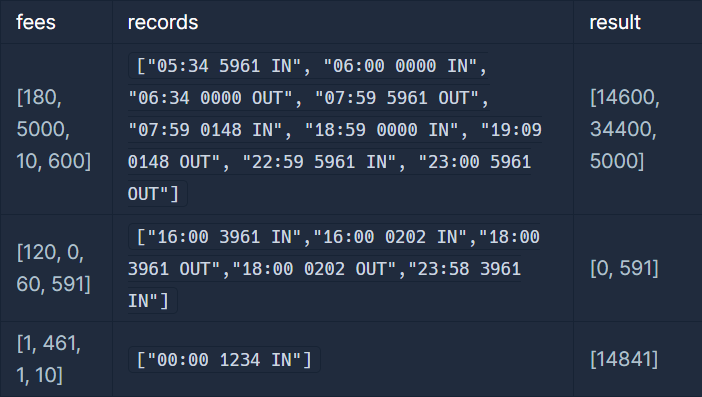

## 입출력 예 설명

### 입출력 예 #1

문제 예시와 같습니다.

### 입출력 예 #2

- 요금표

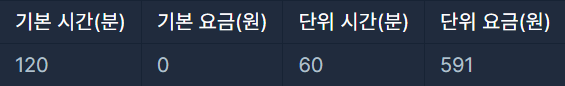

- 입/출차 기록

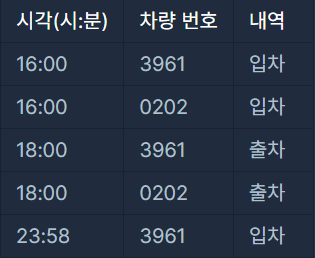

- 자동차별 주차 요금

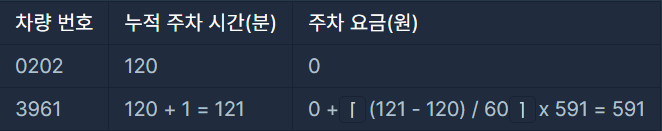

- 3961번 차량은 2번째 입차된 후에는 출차된 내역이 없으므로, 23:59에 출차되었다고 간주합니다.

### 입출력 예 #3

- 요금표

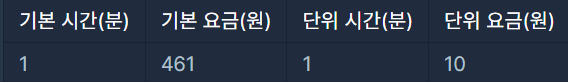

- 입/출차 기록

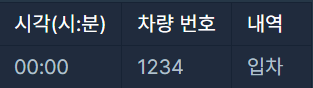

- 자동차별 주차 요금

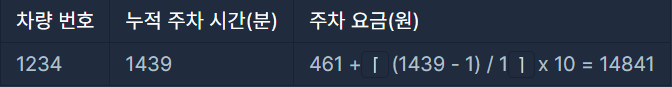

- 1234번 차량은 출차 내역이 없으므로, 23:59에 출차되었다고 간주합니다.

##제한시간 안내

- 정확성 테스트 : 10초

In [39]:
import math

def solution(fees, records):
    answer, check, check2, check3 = [], {}, {}, {}
    
    for record in records:
        rec = record.split(' ')
        if rec[2] == "IN":
            check[rec[1]] = int(rec[0][0 : 2]) * 60 + int(rec[0][3 : ])
            check2[rec[1]] = 1
        else:
            if rec[1] not in check3:
                check3[rec[1]] = [(int(rec[0][0 : 2]) * 60 + int(rec[0][3 : ])) - check[rec[1]]]
                check2[rec[1]] -= 1
            else:
                check3[rec[1]].append((int(rec[0][0 : 2]) * 60 + int(rec[0][3 : ])) - check[rec[1]])
                check2[rec[1]] -= 1

    for key in check2:
        if check2[key] == 1:
            if key in check3:
                check3[key].append(1439 - check[key])
            else:
                check3[key] = 1439 - check[key]

    check3 = sorted(check3.items())

    for chk in check3:
        if type(chk[1]) is list:
            if sum(chk[1]) < fees[0]:
                answer.append(fees[1])
            else:
                answer.append(fees[1] + (math.ceil((sum(chk[1]) - fees[0]) / fees[2])) * fees[3])
        else:
            if chk[1] < fees[0]:
                answer.append(fees[1])
            else:
                answer.append(fees[1] + (math.ceil((chk[1] - fees[0]) / fees[2])) * fees[3])
    return answer
solution([180, 5000, 10, 600], ["05:34 5961 IN", "06:00 0000 IN", "06:34 0000 OUT", "07:59 5961 OUT", "07:59 0148 IN", "18:59 0000 IN", "19:09 0148 OUT", "22:59 5961 IN", "23:00 5961 OUT"])

[14600, 34400, 5000]